In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [ ]:
traffic = ctrl.Antecedent(np.arange(0, 11, 1), 'traffic')
distance = ctrl.Antecedent(np.arange(0, 11, 1), 'distance')
weather = ctrl.Antecedent(np.arange(0, 11, 1), 'weather')
time = ctrl.Antecedent(np.arange(0, 11, 1), 'time')
fatigue = ctrl.Antecedent(np.arange(0, 11, 1), 'fatigue')

delivery = ctrl.Consequent(np.arange(0, 11, 1), 'delivery')
bonus = ctrl.Consequent(np.arange(0, 11, 1), 'bonus')
rating = ctrl.Consequent(np.arange(0, 11, 1), 'rating')


In [ ]:

traffic['low'] = fuzz.trimf(traffic.universe, [0, 0, 4])
traffic['medium'] = fuzz.trimf(traffic.universe, [3, 5, 7])
traffic['high'] = fuzz.trimf(traffic.universe, [6, 10, 10])

distance['short'] = fuzz.trimf(distance.universe, [0, 0, 4])
distance['medium'] = fuzz.trimf(distance.universe, [3, 5, 7])
distance['long'] = fuzz.trimf(distance.universe, [6, 10, 10])

weather['clear'] = fuzz.trimf(weather.universe, [0, 0, 4])
weather['rainy'] = fuzz.trimf(weather.universe, [3, 5, 7])
weather['stormy'] = fuzz.trimf(weather.universe, [6, 10, 10])

time['fast'] = fuzz.trimf(time.universe, [0, 0, 4])
time['medium'] = fuzz.trimf(time.universe, [3, 5, 7])
time['slow'] = fuzz.trimf(time.universe, [6, 10, 10])

fatigue['low'] = fuzz.trimf(fatigue.universe, [0, 0, 4])
fatigue['medium'] = fuzz.trimf(fatigue.universe, [3, 5, 7])
fatigue['high'] = fuzz.trimf(fatigue.universe, [6, 10, 10])

delivery['short'] = fuzz.trimf(delivery.universe, [0, 0, 4])
delivery['medium'] = fuzz.trimf(delivery.universe, [3, 5, 7])
delivery['long'] = fuzz.trimf(delivery.universe, [6, 10, 10])

bonus['low'] = fuzz.trimf(bonus.universe, [0, 0, 4])
bonus['medium'] = fuzz.trimf(bonus.universe, [3, 5, 7])
bonus['high'] = fuzz.trimf(bonus.universe, [6, 10, 10])

rating['poor'] = fuzz.trimf(rating.universe, [0, 0, 4])
rating['average'] = fuzz.trimf(rating.universe, [3, 5, 7])
rating['excellent'] = fuzz.trimf(rating.universe, [6, 10, 10])


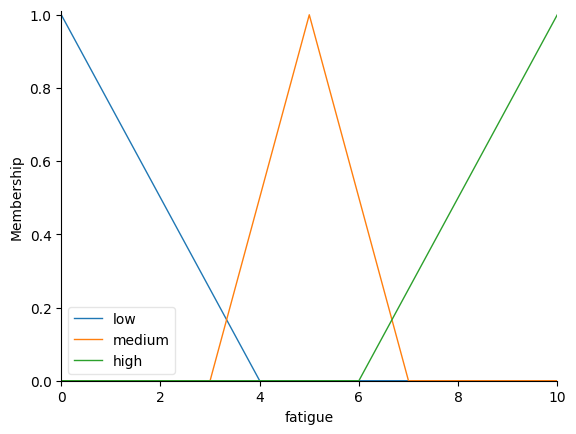

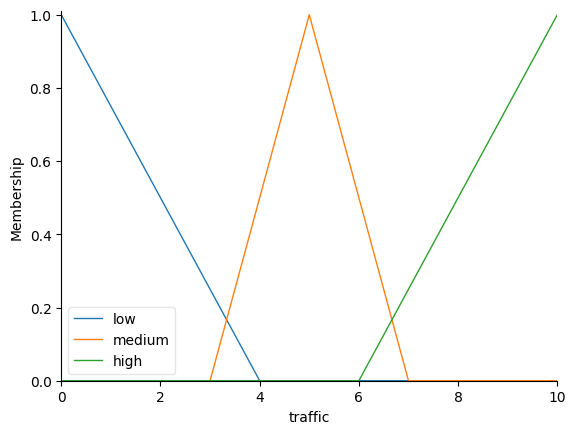

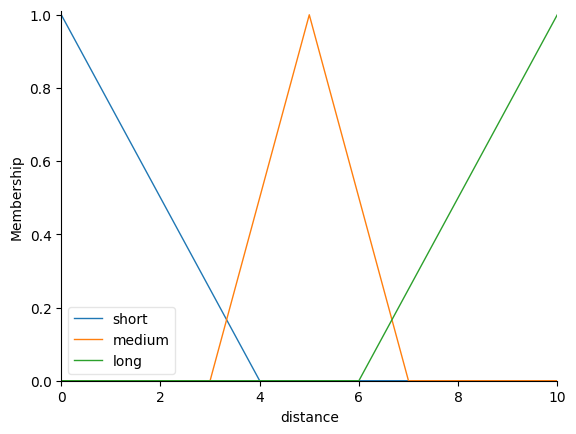

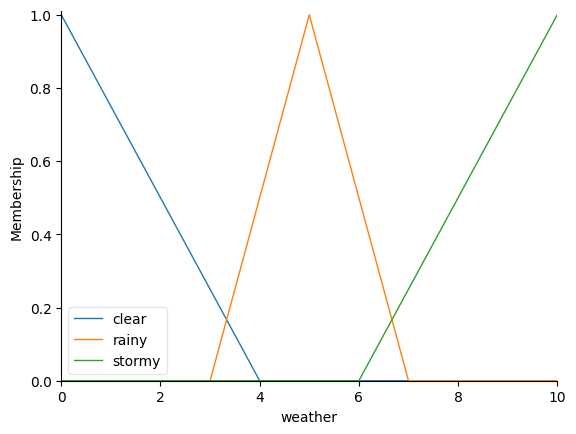

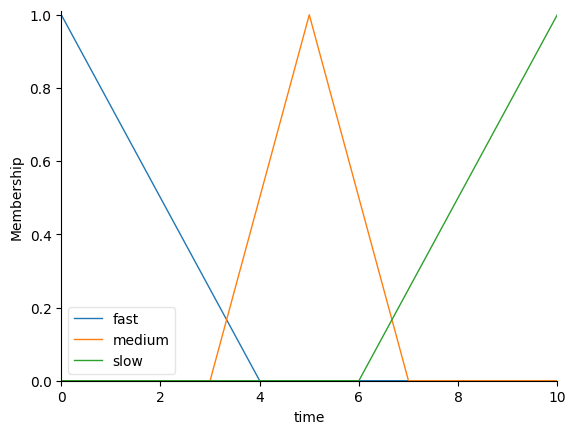

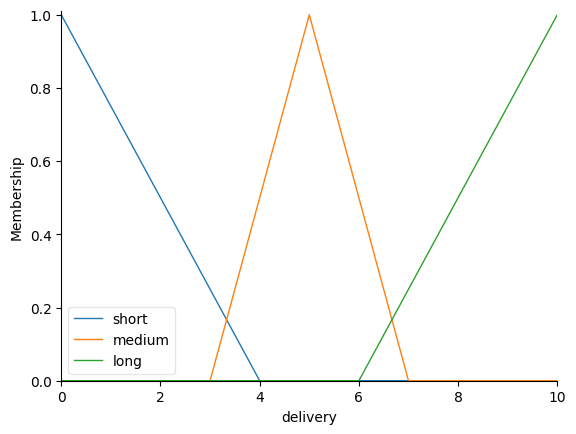

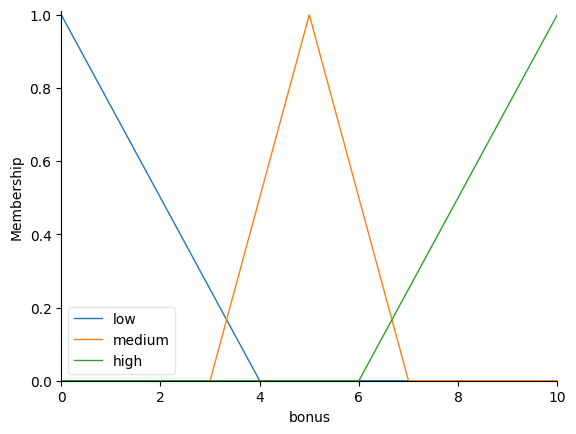

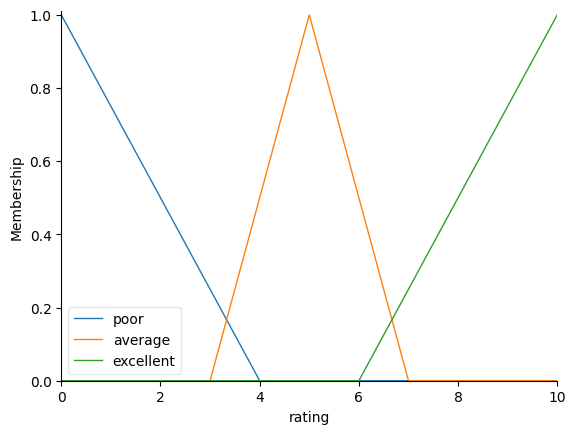

In [ ]:
fatigue.view()
traffic.view()
distance.view()
weather.view()
time.view()
delivery.view()
bonus.view()
rating.view()

In [ ]:
rule1 = ctrl.Rule(traffic['low'] & distance['short'], delivery['short'])
rule2 = ctrl.Rule(traffic['medium'] & distance['medium'], delivery['medium'])
rule3 = ctrl.Rule(traffic['high'] & distance['long'], delivery['long'])

rule4 = ctrl.Rule(weather['clear'], bonus['low'])
rule5 = ctrl.Rule(weather['rainy'], bonus['medium'])
rule6 = ctrl.Rule(weather['stormy'], bonus['high'])

rule7 = ctrl.Rule(time['fast'] & traffic['low'], delivery['short'])
rule8 = ctrl.Rule(time['medium'] & traffic['medium'], delivery['medium'])
rule9 = ctrl.Rule(time['slow'] & traffic['high'], delivery['long'])

rule10 = ctrl.Rule(fatigue['low'], rating['excellent'])
rule11 = ctrl.Rule(fatigue['medium'], rating['average'])
rule12 = ctrl.Rule(fatigue['high'], rating['poor'])

rule13 = ctrl.Rule(distance['long'] & weather['stormy'] & traffic['high'],
                   [delivery['long'], bonus['high']])
rule14 = ctrl.Rule(distance['short'] & weather['clear'] & traffic['low'],
                   [delivery['short'], bonus['low']])
rule15 = ctrl.Rule(fatigue['high'] & traffic['high'],
                   [rating['poor'], delivery['long']])


In [ ]:
truonghuy = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
         rule10, rule11, rule12, rule13, rule14, rule15])
ueh = ctrl.ControlSystemSimulation(truonghuy)

ueh.input['traffic'] = 7
ueh.input['distance'] = 8
ueh.input['weather'] = 9
ueh.input['time'] = 6
ueh.input['fatigue'] = 5

ueh.compute()

# In kết quả
print("Thời gian giao hàng dự kiến:", ueh.output['delivery'])
print("Tiền thưởng khuyến khích:", ueh.output['bonus'])
print("Đánh giá hiệu suất của trình điều khiển:", ueh.output['rating'])


Thời gian giao hàng dự kiến: 8.238095238095239
Tiền thưởng khuyến khích: 8.6
Đánh giá hiệu suất của trình điều khiển: 5.000000000000001
